# Artificial Neural Networks 1 - The Single Layer Perceptron

## This week's problem:
## Train a simple Neural Network to distinguish between two different types of Iris flowers

### Description

<br />
<br />

<div>
<img src="./Figures/iris_measurements.png" width="200" align="center">
    <br/><a align="center" href="https://kedro.readthedocs.io/en/stable/02_get_started/05_example_project.html">Image taken from Kedro</a>
</div>

Based on some measurements about iris flowers, such as sepal length/width, we would like to create an algorithm to distinguish their class, which in our case can be either "Iris-setosa" or "Iris-versicolor". 

We assume that there is no information to guide us, other than some examples of measurements and the corresponding class these measurements belong to. For example:

| sepal length (cm) | sepal width (cm) | petal length (cm) | petal width (cm) |      class      |
|-------------------|------------------|-------------------|------------------|-----------------|
|        4.9        |       3.0        |        1.4        |        0.2       |   Iris setosa   |
|        5.9        |       3.0        |        4.2        |        1.5       | Iris versicolor |

### The dataset

The full dataset for this week's problem can be found by following [this link](https://archive.ics.uci.edu/ml/datasets/iris). In the accompanying file `iris_partial.csv`, a part of the dataset is included in `.csv` (comma separated values) format. The file can be red and visualised using `pandas`:

In [1]:
import pandas as pd #import pandas module

#pd.set_option('display.max_rows', None) #uncomment this line to view full dataset

irisDf = pd.read_csv("iris_partial.csv") #read the file containing the data

irisDf #visualise data

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor


### Relevance

<br />
<br />

<div>
<img src="./Figures/relevance.png" width="900" align="center">
    <br/><a align="center" href="https://www.qualitymag.com/articles/96664-how-ai-and-machine-vision-impact-vision-robotics">Image taken from Quality magazine</a>
</div>

The problem described above might initially seem unrelated to industrial applications. However, from a mathematical/methodological point of view, it is very similar to several important applications. For instance, some of the algorithms used to distinguish between different types of flowers, can also be used to distinguish between pictures of different objects, a task needed to guide industrial robots.

## Machine Learning

To solve todays problem, we will employ Machine Learning (ML) techniques. So before getting into the specifics, let's start with some general information.

[Definition](http://www.cs.cmu.edu/~tom/mlbook.html):
<div class="alert alert-block alert-info">
Machine Learning is the study of computer algorithms that improve automatically through experience.
</div>

Although the range of potential applications is vast, most machine learning methods can be thought of as function approximators, i.e. methods aiming at constructing models that approximate functions. However, the structure of these models, as well as the ways in which they can be reconfigured to approximate different functions, vary widely among different methods.

In the following, some definitions are given, which should illustrate how these methods are relevant for our problem.

### Typical Machine Learning Tasks

Machine learning can be used for a variety of tasks, two of the most common ones are:

<table align="center">
  <tr>
     <td>
        <img src="./Figures/Regression.png" width="450">
         <br/><a align="center">Regression</a>
     </td>
     <td>
        <img src="./Figures/Classification.png" width="450">
        <br/><a align="center">Classification</a>
     </td>
  </tr>
</table>

+ **Regression**: this is the task of approximating the relationship between a dependent variable $\mathbf{y}$ and an independent variables $\mathbf{x}$. For example, given a company's sales over the last months, predict the sales in the following months. In this case, time is the independent variable and sales are the dependent one.
+ **Classification**:this involves assigning inputs to one of $k$ categories. For example, specify whether a given image depicts a bus, an airplane, or a ship. The special case where the number of categories is two, is refered to as **binary classification**.

<div class="alert alert-block alert-info">
Both of the above tasks, can be viewed as function approximation:
    <li> In the case of regression, we try to find a function $f$ that maps the inputs $\mathbf{x}$ to the outputs $\mathbf{y}$: $\mathbf{y}=f\left( \mathbf{x} \right)$</li>
    <li> In the case of classification, the task is almost the same, the different being that the output is not a real number, or set of real numbers as in the regression case. Rather, it is an integer number, assuming values in the range $[1,k]$, where $k$ is the number of classes. </li>
</div>

Our problem for today is a **classification** problem, and since we are only considering two categories of flowers, it can be further categorised as **binary classification**.

### Machine Learning Approaches

<br />
<br />

<div>
<img src="./Figures/supervised_unsupervised.png" width="1200" align="center">
</div>

As mentioned above, machine learning algorithms learn through experience. In most cases, experience is provided in terms of **data** with examples relevant to the task to be performed. Depending on the exact form of the provided data, two models of learning can be defined:

+ **Supervised learning**: in this case, the provided data contains examples of inputs as well as outputs, also termed **labels**. For instance, for the problem of classifying images of means of transport, data would consist of a set of images of buses, airplanes etc. Labels, would consist of the category in which each each image belongs to. 
+ **Unsupervised learning**: in this case, only inputs are provided as data and the algorithm should discover patterns in this data. For example, given usage data of a large group of users of an online platform, an algorithm might be employed to subdivide them to groups according to their preferences and, based on that, provide suggestions to individual users.

Today's problem is a supervised learning problem, where data is provided in terms of the folwer measurements and labels are provided in terms of the flower class. While, in our case, labels are provided in terms of class names, they can be easily converted to numerical values, for instance 0 for 'Iris-setosa' and 1 for 'Iris-versicolor'.

## Artificial Neural Networks

<br />
<br />

<div>
<img src="./Figures/artificial_intelligence.jpg" width="800" align="center">
    <br/><a align="center" href="https://www.intelligenttransport.com/transport-articles/131855/artificial-intelligence-public-transport/">Image taken from Intelligent Transport</a>
</div>

As mentioned above, most machine learning methods aim at constructing function approximators. Biological neural networks, such as the human brain can also be viewed as a function approximators, receiving inputs, such as signals from sensory neurons, and transforming them into outputs, such as signals to motor neurons connected to muscles. More importantly, biological neural networks have the ability to adjust to different conditions and improve their performance, a property that is desirable also for machine learning methods.

Artificial Neural Networks (ANNs) are machine learning systems, whose structure is inspired from biological neural networks, in an attempt to mimic the above features. Today's problem can be solved using a very simple type of neural network, which we will describe in detail in what follows.

### Single Layer Perceptron

<br />
<br />

<div>
<img src="./Figures/Components_of_neuron.jpg" width="800" align="center">
    <br/><a align="center" href="https://opentextbc.ca/introductiontopsychology/chapter/3-1-the-neuron-is-the-building-block-of-the-nervous-system/">Components of a neuron by Jennifer Walinga</a>
</div>

The Single Layer Perceptron (SLP) is an elementary model of a neuron, and probably the simplest possible neural network. Similarly to a neuron, it receives different input signals and transforms them to a single output.

#### Elements of the SLP

A SLP is composed of layers, including the following elements.

<br />
<br />

<div>
<img src="./Figures/slp.png" width="700" align="center">
</div>

##### Inputs

The first element of the SLP are the input nodes, containing the multi-dimensional input $x_1, x_2, \dots, x_n$ of the perceptron. These correspond to the input signals reaching a biological neuron coming, for instance, from sensory neurons.

##### Weights, summing and bias

Each input node is connected to a node of the next layer, where all inputs $x_i$ are weighted by corresponding weights $w_i$, and summed, yelding the weighted sum: $\Sigma w_i x_i$. An additional value, termed bias $b$, is then added to the result.

In the above operations, high or low weights could be interpreted as strong or weak connections between the input nodes and the next layer.

##### Activation function

As a last operation performed by the SLP, the result of the above operations is used as input for a so called activation function. In the following table, examples of commonly used activation functions are given.

|Activation function|               Expression                   |                                 Graph                      |
|-------------------|--------------------------------------------|------------------------------------------------------------|
|       Linear      |          $$ f\left( x \right) = x $$       |<img src="./Figures/linear.png" width="300" align="center"> |
|       Heaviside   |$$ f\left( x \right) = \left\{\begin{array}{c} 0, \qquad x < 0 \\ 1, \qquad x \geq 0 \end{array}\right.$$|<img src="./Figures/heaviside.png" width="300" align="center">|
|        Sigmoid    |$$ f\left( x \right)=\frac{1}{1+e^{-a x}} $$|<img src="./Figures/sigmoid.png" width="300" align="center">|

The linear activation function essentially corresponds to no activation function. The remaining functions, result to either 0 or 1, with or without a transition zone in between. This aims at imitating the firing of neurons depending on whether the input signals are strong enough.

Traditionally, SLPs use the Heaviside activation function, however in what follows, we will use the sigmoid, since it is more representative of the general case. Modern neural networks employ different activation functions, which we will explore in the next lecture.

##### Output

Depending on the activation function used, the output of the SLP might be unbounded, or within the interval $[ 0,1 ]$. In the first case, the output could be used for regression, while in the second it might be more suitable for binary classification. For example, using a simple threshold, binary outputs can be obtained as:

$$\text{output} = \left\{\begin{array}{c }
                         0, \qquad y < \text{threshold}   \\
                         1  \qquad y \geq \text{threshold} \end{array}\right.$$

with 0.5 a common value for the threshold.

#### Mathematical expression

The operations performed by individual elements can be compactly described by a simple mathematical expression:

$ y = f\left( \Sigma_{i=1}^n w_i x_i + b \right)$

with $f$ being one of the activation functions described above.

The inputs and weights in the above expression can be written as vectors:

$$\mathbf{x} = \left[	
	\begin{array}{c }
    	x_1   \\
     	x_2   \\
        \vdots \\
        x_n  \end{array}\right]$$
        
$$\mathbf{w} = \left[	
	\begin{array}{c }
    	w_1   \\
     	w_2   \\
        \vdots \\
        w_n  \end{array}\right]$$

Then, the mathematical expression describing the SLP can be re-written as:

$$ y = f\left( \mathbf{x}^T \mathbf{w} + b \right) $$

#### Geometrical interpretation

##### 1D case

A geometrical interpretation of the elements of the SLP can provide some further insight. For example, let's consider a SLP with a single input $x$ and a linear activation function. The output is given by:

$$y = w x + b$$

<div class="alert alert-block alert-info">
The SLP approximates functions with lines! Thus, it should be equivalent to linear regression.
</div>

##### 2D and higher dimensional case

<br />
<br />

<div>
<img src="./Figures/linearly_separable.png" width="500" align="center">
</div>

<br />

Next let's consider a SLP with a two dimentional input and and activation function. The output is:

$$ y = f\left( w_1 x_1 + w_2 x_2 + b \right) = f\left( \mathbf{x}^T \mathbf{w} + b \right) $$

The expression $\mathbf{x}^T \mathbf{w} + b$ is the equation of a line in the two dimensional plane. It will yield positive values for points on one side of the line, negative values for points on the other side, and zero for points on the line. Applying an activation function on the result of this epression will result in values close to zero for points on one side of the line, values close to one for points on the other side of the line and 0.5 for points on the line.


<div class="alert alert-block alert-info">
The SLP essentially defines a line in the two dimensional plane and assigns points on each side of the line to a different class! Similarly, for higher dimensional inputs, the SLP defines planes and hyperplanes.
</div>

### Example

Let's illustrate the above concepts using an example. Consider the following points in the two-dimensional plane, labeled with 0 or 1:

|   $$x_1$$   |   $$x_2$$   | label |
|-------------|-------------|-------|
| 8.51238062  | -8.76864249 |   0   |
| 6.9330325   | -9.29863235 |   0   |
| -2.06950209 | -9.59023795 |   0   |
| 6.86539779  | -4.88532313 |   0   |
| 9.36931477  | -1.94525181 |   0   |
| 9.60978718  | -1.69978847 |   0   |
| 2.02824178  | -4.47718114 |   0   |
|-3.38539501  | -7.1189215  |   0   |
| 5.78223496  | -2.34854873 |   0   |
| 6.52367412  | -1.08966775 |   0   |
| -1.18064469 | 3.93168945  |   1   |
|  2.55102216 | 7.07542036  |   1   |
| -6.25752382 | 3.39005381  |   1   |
| -2.96953921 | 6.03485266  |   1   |
| -5.59346953 | 6.07068803  |   1   |
| -9.59644732 | 4.9616529   |   1   |
| -5.85326519 | 7.07350523  |   1   |
| -4.98872308 | 7.76378415  |   1   |
| -7.60106264 | 7.0364926   |   1   |
| -9.16771375 | 7.96643062  |   1   |

They can be represented as numpy arrays and visualised as:

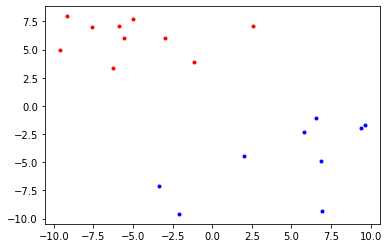

In [2]:
#import numpy and matplotlib
import numpy as np
from matplotlib import pyplot as plt

#define arrays with input data and labels
x = np.array([[ 8.51238062,  6.9330325 , -2.06950209,  6.86539779,  9.36931477,
         9.60978718,  2.02824178, -3.38539501,  5.78223496,  6.52367412,
        -1.18064469,  2.55102216, -6.25752382, -2.96953921, -5.59346953,
        -9.59644732, -5.85326519, -4.98872308, -7.60106264, -9.16771375],
       [-8.76864249, -9.29863235, -9.59023795, -4.88532313, -1.94525181,
        -1.69978847, -4.47718114, -7.1189215 , -2.34854873, -1.08966775,
         3.93168945,  7.07542036,  3.39005381,  6.03485266,  6.07068803,
         4.9616529 ,  7.07350523,  7.76378415,  7.0364926 ,  7.96643062]])

labels = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

#plot the first 10 points (label 0) with red color and the remaining 10 (label 1) with blue
plt.plot(x[0,1:10],x[1,1:10],'.b')
plt.plot(x[0,10:],x[1,10:],'.r')
plt.show()

#### Weights and bias

Next, consider a SLP with a sigmoid activation function and the following weights/bias:

$$w_1 = -0.5, \ w_2 = 1.0 \\
b = 0$$

#### Point with label 0

Applying the weights and bias to the first point, with coordinates $\left(8.51238062, -8.76864249  \right)$, will yield:

$$w_1 y_1 + w_2 y_2 +b = -0.5 \times 8.51238062 + 1.0 \times \left( -8.76864249 \right) + 0 = -13.0248328$$

Applying the sigmoid activation function:

$$\dfrac{1}{1+e^{-\left( -13.0248328 \right)}} = 2.20488544 \times 10^{-6}$$

Applying a 0.5 threshold to the result yields the value 0.

#### Point with label 1

Similarly for a point with coordinates $\left(-1.18064469, 3.93168945  \right)$ and label 1:

$$w_1 y_1 + w_2 y_2 +b = -0.5 \times \left( -1.18064469 \right)+ 1.0 \times 3.93168945 + 0 = 4.5220118$$

$$\dfrac{1}{1+e^{-4.5220118}} = 0.989249686$$

A 0.5 threshold yields a value of 1.

#### Evaluation for all points using `numpy`

The above operations can be applied to all points using numpy and matrix operations:

In [3]:
#define array with weights and bias
w = np.array([-0.5,1.0])
b = 0

#compute the weighted sum as a matrix operation
weightedSum = np.matmul(x.transpose(),w)+b

#use numpy to compute the value of the activation function
y = 1/(1+np.exp(-weightedSum))

#convert the result to binary format by applying a 0.t threshold
yBinary = y>0.5

#print result
print(yBinary)

[False False False False False False False False False False  True  True
  True  True  True  True  True  True  True  True]


The SLP can correctly predict all the labels!

#### Geometrical representation of the SLP

Rewriting the equation of the line defined by the SLP yields:

$$w_1 x_1 + w_2 x_2 + b=0 \rightarrow x_2 = - \dfrac{w_1}{w_2} x_1 - b$$

Then the line can be plotted along with the points:

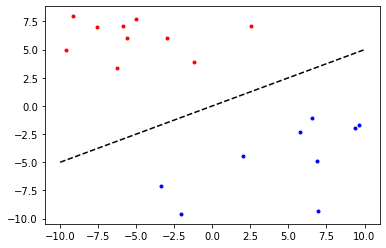

In [4]:
#create array with 100 evenly distributed values between -10 and 10
x1Line = np.linspace(-10,10,100)

#compute x2 values for these points based on the above equation
x2Line = -w[0]/w[1]*x1Line-b

#plot data points and line defined by the SLP
plt.plot(x[0,1:10],x[1,1:10],'.b')
plt.plot(x[0,10:],x[1,10:],'.r')
plt.plot(x1Line,x2Line,'--k')
plt.show()

### Training

In the above example, the SLP successfully classified the points since the provided weights and bias represented a line dividing the two sets of points given. However, in a general case, the weights and bias are not given and should be learned from the data. In general, the process of learning from data is also termed **training** and is a critical part of any machine learning method. As will be illustrated below, training often involves improving some initial values, based on some measure of the error of the predictions made using these values.

SLPs can be trained using a method called the delta rule. Next the rule is described, after some essential introduction and derivations.

#### Error

Consider a SLP as in the previous example. Also, assume that some training data is available in the form of data points $\mathbf{x}_i$ and labels $y^*_i$.

Then, we can initialise the SLP with some arbitrary weights $w_i$ and bias $b$, make a prediction predictions $y_i$ and compute the error between the predictions and the actual labels. There are several ways of defining this error, but for now, let's consider the simple expression):

$$E = \dfrac{1}{2} \Sigma_{i=1}^{m}\left( y^*_i - y_i \right)^2$$

where $m$ is the number of available data points/ labels.

Ideally, we would like to find the set of weights and bias that minimise this error. Since the weights and bias are the unknowns in this case, the problem is reduced to finding the minimum of a multivariate function. Within this setting, the function to be minimised is also termed **objective** or **loss** function.

#### Multivariate optimisation/ the gradient descent method

<br />
<br />

<div>
<img src="./Figures/gradient_descent.png" width="900" align="center">
</div>

For univariate functions, minima or maxima occur at **critical** or **stationary** points, i.e. points where the function's derivative is equal to zero. However, it should be noted that stationary points are not necessarily minima. Moreover, minima and maxima can be local, i.e. the points with the smallest or largest value in their neighbohood, or global, i.e. the points with the absolute smallest or largest value of the function.

For multivariate functions, critical points are points where the function's gradient is equal to zero. For bivariate functions, the gradient is defined as:

$$\nabla f \left( x_1, x_2 \right) = \dfrac{\partial f}{\partial x_1} \mathbf{e}_1 + \dfrac{\partial f}{\partial x_2} \mathbf{e}_2$$

where $\mathbf{e}_1,\mathbf{e}_2$ are the unit vectors in the directions $x_1$ and $x_2$ respectively. The definition is similar for the higher dimenional case.

A commonly used method for minimising multivariate functions is the gradient descent method, which, given an initial point $\mathbf{x}^i$ provides an updated estimate of the minimum as:

$$\mathbf{x}^{i+1} = \mathbf{x}^{i} - \epsilon \nabla f \left( \mathbf{x}^{i} \right)$$

where $\epsilon$ is a positive scalar, termed **learning rate**, which can be determined in various ways. In our case, we will assume it is assigned a constant, small value, e.g. $0.01$.

To gain some further insight on how moving in the direction of the gradient, as described above, will eventually lead to a local minimum, consider a bivariate function as shown in the figure:

* It's gradient is a vector, pointing towards the direction in which the function increases the fastest.
* It is relatively easy to show that, moving at the oposite direction of the gradient will decrease the function the fastest.
* Successive steps along this direction can eventually lead to the minimum of the function.

The gradient descent method belongs to a wider range of methods, utilising gradients to optimise multivariate functions, which can be collectively refered to as **gradient based optimisation** methods.

#### Delta rule

##### Gradient of the error

The delta rule ban be derived by simply applying the gradient descent method to the error defined above. The partial derivatives of the error with respect to the weights can be derived using the chain rule:

$$\dfrac{\partial E}{\partial w_j} = -\Sigma_{i=1}^{m}\left( y^*_i - y_i \right) \dfrac{\partial y_i}{\partial w_j}$$

For a SLP, the derivative of the output with respect to the weights is:

$$\dfrac{\partial y_i}{\partial w_j} = \dfrac{\partial f\left( \Sigma w_k x_k + b \right)}{\partial w_j} $$

where $f$ is the activation function used.

Setting $h = \Sigma w_k x_k + b$ and using the chain rule:

$$\dfrac{\partial y_i}{\partial w_j} = f^{\prime}\left( h \right) \dfrac{\partial h}{\partial w_j} $$

where $f^{\prime}\left( h \right)$ is the derivative of the activation function evaluated for the current weights.

Also, the derivative of $h$ can be obtained as:

$$\dfrac{\partial h}{\partial w_j} = \dfrac{\partial \Sigma w_k x_k + b}{\partial w_j} = x_j$$

Substituting in the initial expression:

$$\dfrac{\partial y_i}{\partial w_j} = f^{\prime}\left( h \right) x_j = f^{\prime}\left( \Sigma w_k x_k + b \right) x_j$$

Then, the expression for the partial derivative of the error becomes:

$$\dfrac{\partial E}{\partial w_j} = - \Sigma_{i=1}^{m}\left( y^*_i - y_i \right) f^{\prime}\left( \Sigma w_k x_k + b \right) x_j$$

The partial derivative with respect to the bias can be obtained in a similar way.

##### Expressions for updating the weights and bias

Using the above, the final rule for updating the weights can be obtained as:

$$w_j^{k+1} = w_j^{k} + \epsilon \Sigma_{i=1}^{m}\left( y^*_i - y_i \right) f^{\prime} x_j$$

where $w_j^{k}$ and $w_j^{k+1}$ are the current and updated estimate of the weights. In vector form, the expression can be rewritten as:

$$\mathbf{w}^{k+1} = \mathbf{w}^{k} + \epsilon \Sigma_{i=1}^{m}\left( y^*_i - y_i \right) f^{\prime} \mathbf{x}$$


Similarly, an expression for the bias can be derived: 

$$b^{k+1} = b^{k+1} + \epsilon \Sigma_{i=1}^{m}\left( y^*_i - y_i \right) f^{\prime}$$

Notice that in the above expression, the derivative of the activation function is required. For all commonly used activation functions, derivatives can be computed analytically, allowing to easily implement gradient based optimisation methods. This is a very important feature of neural networks, which is partially responsible for their success.

Moreover, in the general case, multiple iterations might be necessary, which can be performed with all or parts of the available data, termed **batches**. For example, half of the data might be used to update the weights during the first iteration, the other half during the second, then again the first half during the third etc. Every iteration or set of iterations during which all of the data is used, is called an **epoch**.

#### Example

Let's illustrate the training process for a SLP using the example introduced above.

To facilitate the process, we can define functions for the sigmoid and it's derivative, given as:

$$ f\left( x \right)=\frac{1}{1+e^{-a x}} $$
$$ f^\prime\left( x \right)= f\left( x \right) \left[1-f\left( x \right) \right] $$

These can be defined in python as:

In [ ]:
import numpy as np

def sigmoid(x):
    '''Function implementing a sigmoid activation function using numpy. 
       x is assumed to be a numpy array and the output argument will be a numpy array of the same size'''
    return 1/(1+np.exp(-x))

def sigmoidDerivative(x):
    '''Function implementing the derivative of a sigmoid activation function using numpy. 
       x is assumed to be a numpy array and the output argument will be a numpy array of the same size'''
    return sigmoid(x)*(1-sigmoid(x))

Then, we will initialise the SLP with zero weights and bias and apply the delta rule once to improve these values:

In [ ]:
import numpy as np #import numpy

epsilon=0.01 #learning rate
m = len(labels) #number of training data points

#initial weights and bias
wt = np.array([0.,0.])
bt = 0

#Evaluate the SLP expression to obtain an initial prediction
y = sigmoid((np.matmul(x.transpose(),wt)+bt))

#Compute and print error of initial prediction
E = 0.5*((labels-y)**2).sum()

print('Initial error: ', E)

#Update weights and bias using the delta rule
#compute derivative of activation function
activationDerivative = sigmoidDerivative((np.matmul(x.transpose(),wt)+bt))

#loop training data points and update weights and bias
for i in range(m):
    wt+=epsilon*(labels[i]-y[i])*activationDerivative[i]*x[:,i].transpose()
    bt+=epsilon*(labels[i]-y[i])*activationDerivative[i]

#prediction using updated weights
y = sigmoid(np.matmul(x.transpose(),wt)+bt)

#new error
E = 0.5*((labels-y)**2).sum()

#print error, weights, bias and predictions
print('Updated error:', E)
print('Updated weights: ', wt)
print('Updated bias: ', bt)
print('Updated predictions:', y>0.5)

The new weights obtained are different that the ones used above, however they lead to correct predictions.

To gain some insight, the line obtained after training can be plotted as:

In [ ]:
#create array with 100 evenly distributed values between -10 and 10
x1Linet = np.linspace(-10,10,100)

#compute x2 values for these points based on the above equation
x2Linet = -wt[0]/wt[1]*x1Linet-bt

#plot data points, line used in first example, and line obtained after training
plt.plot(x[0,1:10],x[1,1:10],'.b')
plt.plot(x[0,10:],x[1,10:],'.r')
plt.plot(x1Line,x2Line,'--k',label='Actual line')
plt.plot(x1Linet,x2Linet,'--g',label='Line after training')
plt.legend()
plt.show()

The line obtained after training correctly divides the training data into two classes.

In the above example, good results were obtained after just one epoch. However, this is not the case in general and very often the accuracy of results depends on the initial values used for the weights.

In the next cell, different values are used for the initial weights, requiring a larger number of epochs to obtain good results:

In [ ]:
import numpy as np #import numpy

epsilon=0.01 #learning rate
m = len(labels) #number of training data points

#initial weights and bias
wt2 = np.array([1.,0.])
bt2 = 0

#Evaluate the SLP expression to obtain an initial prediction
y = sigmoid(np.matmul(x.transpose(),wt2)+bt2)

#Compute and print error of initial prediction
E = 0.5*((labels-y)**2).sum()

print('Initial error: ', E)

In [ ]:
#Update weights and bias using the delta rule
#a loop is added to repeat the update for 10 epochs
for epoch in range(10):
    #compute derivative of activation function
    activationDerivative = sigmoidDerivative((np.matmul(x.transpose(),wt)+bt))

    #loop training data points and update weights and bias
    for i in range(m):
        wt2+=epsilon*(labels[i]-y[i])*activationDerivative[i]*x[:,i].transpose()
        bt2+=epsilon*(labels[i]-y[i])*activationDerivative[i]

    #prediction using updated weights
    y = sigmoid(np.matmul(x.transpose(),wt2)+bt2)

    #new error
    E = 0.5*((labels-y)**2).sum()

    #print error, weights, bias and predictions
    print('Epoch: ', epoch+1, ', error: ' , E)
    
print('Updated weights: ', wt2)
print('Updated bias: ', bt2)
print('Updated predictions:', y>0.5)

The line corresponding to the new weights and bias can also be plotted as:

In [ ]:
#create array with 100 evenly distributed values between -10 and 10
x1Linet2 = np.linspace(-10,10,100)

#compute x2 values for these points based on the above equation
x2Linet2 = -wt2[0]/wt2[1]*x1Linet2-bt2

#plot data points, line used in first example, and line obtained after training
plt.plot(x[0,1:10],x[1,1:10],'.b')
plt.plot(x[0,10:],x[1,10:],'.r')
plt.plot(x1Line,x2Line,'--k',label='Actual line')
plt.plot(x1Linet2,x2Linet2,'--g',label='Line after training')
plt.legend()
plt.show()

### Limitations

<br />
<br />

<div>
<img src="./Figures/non_linearly_separable.png" width="1000" align="center">
</div>

As shown, the SLP classifies data by essentialy drawing a line or plane between two sets of points. This means that it can successfully classify only data that can be separated by such a line or plane. Such data is termed **linearly separable** and describes only a small number of problems. For instance, the full Iris dataset, part of which is used for today's problem, includes three classes, the first two, included in our dataset, are linearly separable, however the third one is not. Therefore the applicability of the SLP is rather limited.

### Training with `Tensor Flow` and `Keras`

While the code provided above is useful for gaining some insight regarding the inner workings of a SLP, realistic problems require more sophisticated algorithms, as well as a series of features which can be very challenging to implement efficiently. Thus, most of the time, libraries, where these features have already been implemented, are used to train and deploy neural networks. [`Tensor FLow`](https://www.tensorflow.org/) is one of the most widely used libraries for machine learning in general and neural networks in particular. It offers a selection of state of the art algorithms, along with several other features. `Keras` is a high level interface for `Tensor Flow`, which allows to very quickly create and train neural networks. Detailed documentatiom of the package can be found in the [`keras` website](https://keras.io/). Next, the process of defining and training the simple SLP used above, in `Keras` is described.

The first step is to import `tensorflow`:

In [2]:
import tensorflow as tf #import tensorflow using an alias

For our purposes, the simplest type of model used by `keras` can be used, which is termed [`sequential`](https://keras.io/guides/sequential_model/):

In [3]:
model = tf.keras.Sequential() #create a model

Now, we can add layers to our model. Since we want to implement a SLP, one layer is enough. When the layer is created, we have to specify the size of the layer's output, also termed number of units, while the number of inputs is set automatically.

Several other options can be specified for each layer, as described [here](https://keras.io/api/layers/core_layers/dense/). In our case we will just consider the following:

+ We will set the `activation` option to 'sigmoid'. This means that a sigmoid activation function will be used.

In [ ]:
model.add(tf.keras.layers.Dense(1, #add a dense layer with 1 unit to the model
                                activation = 'sigmoid' #use a sigmoid activation function
                               ))

Once the layers (or layer in our case!) have been defined, the model can be compiled. At this stage, more options are [available](https://keras.io/api/models/model_training_apis/). More importantly:

* The algorithm used to minimise the loss function can be selected. A common choice is the Adam algorithm, which while sharing some common features with the Gradient descent method described above, offers several improvements. A more complete list of the available optimisers can be found in the [`keras` documentation](https://keras.io/api/optimizers/).
* The loss function definition can also be selected. For this specific problem, we will use the 'BinaryCrossentropy' option, which employs a function suitable for binary classification. More options can be found in the [`keras` documentation](https://keras.io/api/losses/)
* Finally, different metric for estimating the accuracy of the computed results can be selected. In our case we will use 'Accuracy', which represents the frequency by which predictions equal labels, for instance a value of 1.0, means all of the predictions are equal to the labels. All options can be found in the [`keras` documentation](https://keras.io/api/metrics/).

In [ ]:
#compile model
model.compile(optimizer='adam', #use the Adam optimiser
              loss=tf.keras.losses.BinaryCrossentropy(), #use binary cross entropy as a loss function
              metrics=['accuracy']) #use accuracy as a metric

Finally, the model can be trained using the [`fit` method](https://keras.io/api/models/model_training_apis/#fit-method). The following arguments need to be provided:

+ **Input data**: this includes our training data points as a `numpy` array. It should be noted that, `keras` expectes the first direction of this matrix to correspond to different inputs and the second one to correspond to different data points. Therefore data might need to be modified accordingly.
+ **Target data**: This includes our labels as a `numpy` array.

More optional arguments can also be provided. For now we will only set the number of epochs, trying values 10 and 100. Notice that different numbers or epochs, or even different runs with the same number of epochs yield different results. This is a consequence of the weights and bias of the SLP being initialised with random numbers, which change for every run. For now, we will repeat the training a few times, until we can get good results in terms of accuracy. In the future, we will explore more advanced training strategies that will allow us to obtain more consistent results.

In [ ]:
#Try re-running the cell a few times, until a good accuracy can be obtained. 
#Also try changing the number of epochs to 10
model.fit(x.transpose(), labels, epochs=100) # train model.

### Using the model to make predictions

Once the model has been trained, it can be used to make predictions. This can be done using the `predict` method of the `model` class in `keras`, which receives as input a `numpy` array with new data points. In our case, we will test the method with the existing data points:

In [ ]:
#use predict method to obtain the predicted labels for the points used for training
#a 0.5 threshold is used to convert the values to binary format
yPred = model.predict(x.transpose())>0.5

### Visualising results

For classification problems, a useful way of visualising results is through a confusion matrices. In these matrices:

* Rows represent true or actual classes.
* Columns represent predicted classes.
* Element $ij$ represents the number of data points whose actual class was cass $i$ and whose predicted class was class $j$. For example:
    + if the entry in the 1st row and 2nd column is 5, this means that 5 elements that belong to class 1 were classified as belonging to class 2
    + if the entry in the 1st row and 1st column is 10, this means that 10 elements that belong to class 1 were correctly classified as belonging to class 1. 
  
  Therefore, diagonal entries of the matrix represent correctly classified data points and off diagonal entries missclassified ones. Ideally, we would like to obtain a classification matrix with zero off diagonal entries.

To produce such matrices in our case, we will employ the `confusion_matrix` function and `ConfusionMatrixDisplay` class from the `sklearn module`.

First we need to import these:

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Next we can create a confusion matrix using the `confusion_matrix` function. As input, we need to provide the labels predicted by our model, as well as the true labels:

In [ ]:
confusionMatrix=confusion_matrix(labels,yPred)

Finally, the matrix can be plotted using the `ConfusionMatrixDisplay` class, which takes as input the confusion matrix created previously. For nicer visualisation, we will provide an additional optional argument, in the form of a list containing the class names. These will be plotted as labels for the confusion matrix rows and columns.

Once the object is created, it can be plotted using the `plot` method:

In [ ]:
classLabels = ['above','below']

confusionMatrixPlot = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix, display_labels=classLabels)

confusionMatrixPlot.plot()

### Examining the trained SLP

The weights and bias of the model trained with `keras` can be accessed through the `get_layer` method of the model and the `weights` attribute of the layer object as:

In [ ]:
tfWeights = model.get_layer(index=0).weights

The resulting object is a list containing both the weights and bias. Individual values can be accessed as:

In [ ]:
wt3 = np.array([float(tfWeights[0][0]),float(tfWeights[0][1])])
bt3 = float(tfWeights[1][0])

Then, the line represented by the SLP can be plotted as:

In [ ]:
x1Linet3 = np.linspace(-10,10,100)
x2Linet3 = -wt3[0]/wt3[1]*x1Linet3-bt3

plt.plot(x[0,1:10],x[1,1:10],'.b')
plt.plot(x[0,10:],x[1,10:],'.r')
plt.plot(x1Line,x2Line,'--k',label='Actual line')
plt.plot(x1Linet3,x2Linet3,'--g',label='Line after training with keras')
plt.show()

## Summary

### Key points

In this lecture:

+ We introduced some basic machine learning terminology.
+ We presented in detail the structure and training process for the simplest neural network architecture, the SLP.
+ We introduced `keras` and its use in a simple classification problem.

The above should allow us to solve today's problem!

### Resources/Further reading

+ [`keras` website](https://keras.io/)
+ I. Goodfellow, Y. Bengio and A. Courville. *Deep learning*. MIT press, 2016 (library 006.31 GOO)
+ D.W. Patterson. *Artificial Neural Networks: Theory and Applications*. Prentice Hall, 1996 (library 006.3 PAT)
+ K. Mehrotra, C.K. Mohan, S. Ranka. *Elements of Artificial neural networks*, MIT Press, 1997 (library 001.535 MEH)

## Solving this week's problem

Today's problem is a binary classification problem with linearly separable data points.

### Visualising the data

To illustrate how variables are linearly separable, and gain some insight into the problem, we will first create a few plots of our data:

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

# extract sepal length and width and petal length and width from pandas data frame
sepalLength=irisDf['sepal length']
sepalWidth=irisDf['sepal width']
petalLength=irisDf['petal length']
petalWidth=irisDf['petal width']

#create subplots using subplots from pyplot
#this will create a plot including 6 subplots arranged in a 2x3 matrix
fig, axs = plt.subplots(2, 3,figsize=(18,8))

#plot the sepal length vs the sepal width at the first subplot (coordinates 0,0)
#the first 50 points (Iris-setosa) are plotted in blue and the remaining 50 'Iris-versicolor' in red
axs[0,0].plot(sepalLength[:50],sepalWidth[:50],'.b')
axs[0,0].plot(sepalLength[50:],sepalWidth[50:],'.r')
axs[0,0].set(xlabel='sepal length',ylabel='sepal width')

#plot the sepal length vs the petal lenght at the second subplot (coordinates 0,1)
axs[0,1].plot(sepalLength[:50],petalLength[:50],'.b')
axs[0,1].plot(sepalLength[50:],petalLength[50:],'.r')
axs[0,1].set(xlabel='sepal length',ylabel='petal length')

#plot the sepal length vs the petal width at the third subplot (coordinates 0,2)
axs[0,2].plot(sepalLength[:50],petalWidth[:50],'.b')
axs[0,2].plot(sepalLength[50:],petalWidth[50:],'.r')
axs[0,2].set(xlabel='sepal length',ylabel='petal width')

#fill the last three subplots similar to the first three
axs[1,0].plot(sepalWidth[:50],petalLength[:50],'.b')
axs[1,0].plot(sepalWidth[50:],petalLength[50:],'.r')
axs[1,0].set(xlabel='sepal width',ylabel='petal length')

axs[1,1].plot(sepalWidth[:50],petalWidth[:50],'.b')
axs[1,1].plot(sepalWidth[50:],petalWidth[50:],'.r')
axs[1,1].set(xlabel='sepal width',ylabel='petal width')

axs[1,2].plot(petalLength[:50],petalWidth[:50],'.b')
axs[1,2].plot(petalLength[50:],petalWidth[50:],'.r')
axs[1,2].set(xlabel='petal length',ylabel='petal width')

From the above it is clear that the projections of our data points on different planes can be easily separated by lines!

### Formatting and normalising the data

Before creating and training a `keras` model, we need to extract our data from the pandas data frame and normalise it.

The first task can be accomplished by extracting columns of the frame and converting them to `numpy` arrays:

In [ ]:
irisData=irisDf[['sepal length','sepal width','petal length','petal width']].to_numpy()

Normalisation is an important task when preprocessing data for machine learning. It ensures that consistent results can be obtained regardless of the magnitude of tha numerical values in our data set. In our case, we will divide each of the measurements by the maximum value for that measurement found in our data set, thus ensuring that all values are in the range $[0,1]$:

In [ ]:
irisData = irisData/irisData.max(axis=0)

Finally, we will create labels for our data. Since the first 50 entries in our data set correspond to the class 'Iris-setosa' and the last 50 to the class 'Iris-versicolor', the task will simply consist of creating an array with 50 values equal to 0, followed by 50 values equal to 1:

In [ ]:
irisLabels = np.zeros(100)
irisLabels[50:]=1

### Creating and training a model with `keras`

Next, a model can be created and trained using the data extracted above. Different numbers of training epochs can be tested:

### Visualising results

Results can be visualised using a confusion matrix: